# Desafio 2024
## Um filme todo dia durante um mês

### 1. Importar biblioteca e carregar dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('desafio-filmes-2024.csv')
df.head()

,Filme,País,Quem Assistiu,Ano,Duração
0,The Nightmare Before Christmas,EUA,"M, B",1993,76
1,I Saw The TV Glow,EUA,"M, B",2024,100
2,Tetris,Reino Unido,M,2023,118
3,Brothers,EUA,M,2009,105
4,Que Horas Ela Volta?,Brasil,B,2015,112


### 2. Gráfico de filmes por país:

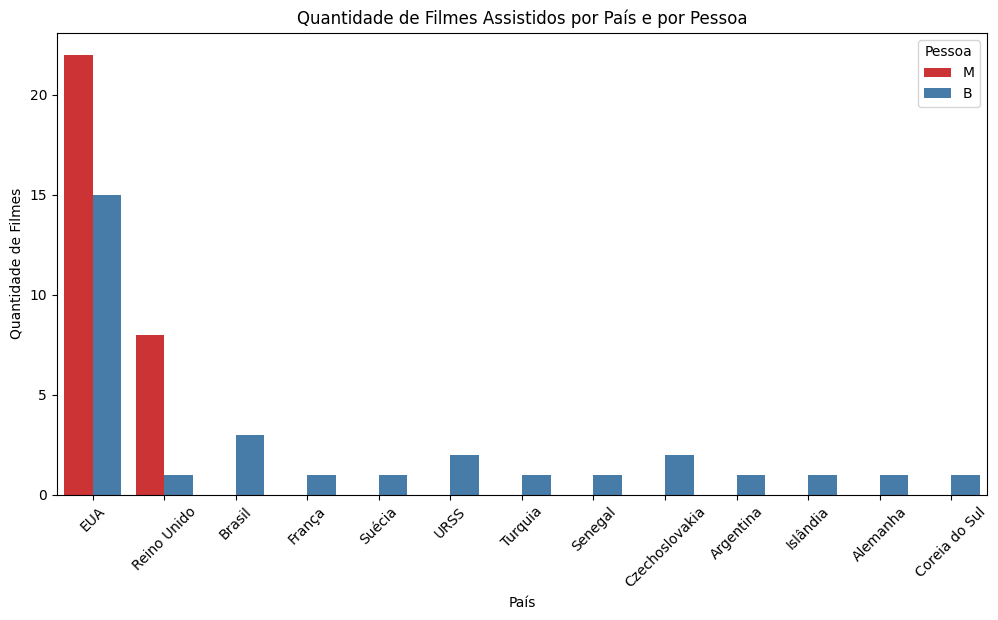

In [35]:
# Criar um gráfico de barras empilhadas para contar os filmes assistidos por país e por quem assistiu
df_filmes_por_pessoa = df.melt(id_vars=['Filme', 'País'], value_vars=['Assistiu_M', 'Assistiu_B'],
                               var_name='Pessoa', value_name='Assistiu')
df_filmes_por_pessoa = df_filmes_por_pessoa[df_filmes_por_pessoa['Assistiu']]

# Substituir os valores para mostrar apenas 'M' e 'B'
df_filmes_por_pessoa['Pessoa'] = df_filmes_por_pessoa['Pessoa'].replace({'Assistiu_M': 'M', 'Assistiu_B': 'B'})

plt.figure(figsize=(12, 6))
sns.countplot(x='País', hue='Pessoa', data=df_filmes_por_pessoa, palette='Set1')

plt.title('Quantidade de Filmes Assistidos por País e por Pessoa')
plt.xlabel('País')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.show()

### 3. Quem viu os filmes de quais países?

In [18]:
agrupamento = df.groupby('Quem Assistiu').apply(lambda x: x[['Filme', 'País']])

for pessoa, filmes in agrupamento.groupby(level=0):
    print(f"\nQuem Assistiu: {pessoa}")
    for idx, filme in filmes.iterrows():
        print(f"  - {filme['Filme']} ({filme['País']})")



Quem Assistiu: B
  - Que Horas Ela Volta? (Brasil)
  - Memento (EUA)
  - Les Yeux sans visage (França)
  - Brokeback Mountain (EUA)
  - Nattvardsgästerna (Suécia)
  - Central do Brasil (Brasil)
  - Сталкер (URSS)
  - The Substance (Reino Unido)
  - Judas and the Black Messiah (EUA)
  - Rio 40 Graus (Brasil)
  - Bir Zamanlar Anadolu'da (Turquia)
  - Puss in Boots: The Last Wish (EUA)
  - Scarface (EUA)
  - La Noire de... (Senegal)
  - But I’m a Cheerleader (EUA)
  -  Ostře sledované vlaky (Czechoslovakia)
  - Sedmikrásky (Czechoslovakia)
  - Familia sumergida (Argentina)
  - Pink Flamingos (EUA)
  - Moonlight (EUA)
  - Vanskabte land (Islândia)
  - Goodfellas (EUA)
  - Das Cabinet des Dr. Caligari (Alemanha)
  - 기생충 (Coreia do Sul)
  - Drive (EUA)
  - Django Unchained (EUA)
  - Солярис (URSS)

Quem Assistiu: M
  - Tetris (Reino Unido)
  - Brothers (EUA)
  - Good Morning, Vietnam (EUA)
  - Get Out (EUA)
  - Pokemon Detective Pikachu (EUA)
  - Tron (EUA)
  - 500 Days of Summer (EUA)
  - 

C:\Users\User\AppData\Local\Temp\ipykernel_2652\3063083473.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agrupamento = df.groupby('Quem Assistiu').apply(lambda x: x[['Filme', 'País']])


### 4. Estatísticas de duração dos filmes

In [10]:
filme_mais_longo = df.loc[df['Duração'].idxmax()]
filme_mais_curto = df.loc[df['Duração'].idxmin()]

media_duracao = df['Duração'].mean()
mediana_duracao = df['Duração'].median()
moda_duracao = df['Duração'].mode()[0]

print(f"Filme mais longo: {filme_mais_longo['Filme']} ({filme_mais_longo['Duração']} minutos)")
print(f"Filme mais curto: {filme_mais_curto['Filme']} ({filme_mais_curto['Duração']} minutos)")
print(f"Média de duração: {media_duracao:.2f} minutos")
print(f"Mediana de duração: {mediana_duracao} minutos")
print(f"Moda de duração: {moda_duracao} minutos")


Filme mais longo: Scarface (169 minutos)
Filme mais curto: La Noire de... (65 minutos)
Média de duração: 114.56 minutos
Mediana de duração: 110.0 minutos
Moda de duração: 91 minutos


### 5. Estatísticas de ano dos filmes

In [23]:
filme_mais_antigo = df.loc[df['Ano'].idxmin()]
ano_mais_novo = df['Ano'].max()
filmes_mais_novos = df[df['Ano'] == ano_mais_novo]

media_ano = df['Ano'].mean()
mediana_ano = df['Ano'].median()
moda_ano = df['Ano'].mode()[0]

print(f"Filme mais antigo: {filme_mais_antigo['Filme']} ({filme_mais_antigo['Ano']})")
print(f"Filmes mais novos ({ano_mais_novo}):")
for idx, filme in filmes_mais_novos.iterrows():
    print(f"  - {filme['Filme']} ({filme['País']})")
print(f"Média dos anos: {media_ano:.2f}")
print(f"Mediana dos anos: {mediana_ano}")
print(f"Moda dos anos: {moda_ano}")

Filme mais antigo: Das Cabinet des Dr. Caligari (1920)
Filmes mais novos (2024):
  - I Saw The TV Glow (EUA)
  - The Substance (Reino Unido)
Média dos anos: 2001.37
Mediana dos anos: 2009.0
Moda dos anos: 2021


### 6. Tempo total de filmes assistidos por pessoa

In [12]:
tempo_total_por_pessoa = df.groupby('Quem Assistiu')['Duração'].sum()
print(tempo_total_por_pessoa)

Quem Assistiu
B       3136
M       3004
M, B     390
Name: Duração, dtype: int64


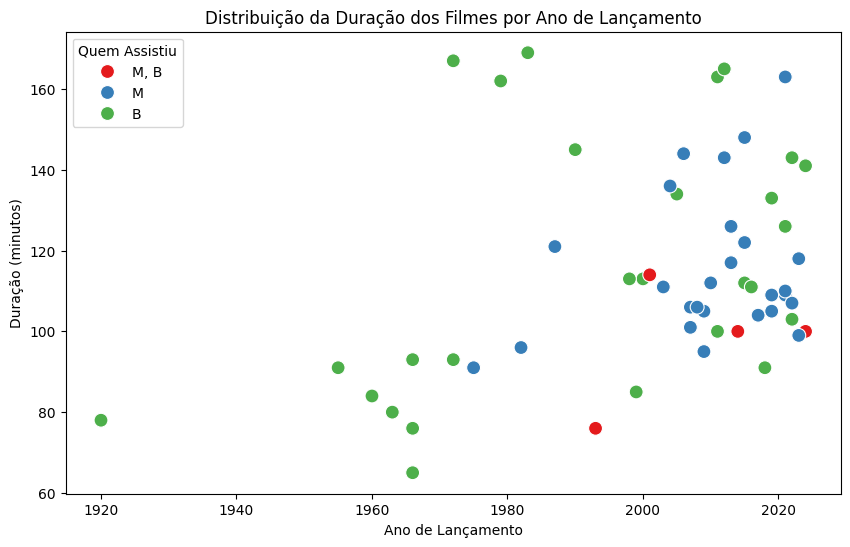

In [27]:
# Gráfico de dispersão com o ano de lançamento no eixo X
plt.figure(figsize=(10, 6))  # Ajuste do tamanho da figura
sns.scatterplot(data=df, x="Ano", y="Duração", hue="Quem Assistiu", palette="Set1", s=100)

plt.title('Distribuição da Duração dos Filmes por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.show()

In [29]:
df['Assistiu_M'] = df['Quem Assistiu'].apply(lambda x: 'M' in x)  # Se M assistiu
df['Assistiu_B'] = df['Quem Assistiu'].apply(lambda x: 'B' in x)  # Se B assistiu

def estatisticas_pessoa(df, pessoa):
    filmes_pessoa = df[df[f'Assistiu_{pessoa}']]
    filme_mais_antigo = filmes_pessoa.loc[filmes_pessoa['Ano'].idxmin()]
    filme_mais_recente = filmes_pessoa.loc[filmes_pessoa['Ano'].idxmax()]
    filme_mais_curto = filmes_pessoa.loc[filmes_pessoa['Duração'].idxmin()]
    filme_mais_longo = filmes_pessoa.loc[filmes_pessoa['Duração'].idxmax()]
    media_duracao = filmes_pessoa['Duração'].mean()
    mediana_duracao = filmes_pessoa['Duração'].median()

    print(f"Estatísticas para {pessoa}:")
    print(f"  Filme mais antigo: {filme_mais_antigo['Filme']} ({filme_mais_antigo['Ano']})")
    print(f"  Filme mais recente: {filme_mais_recente['Filme']} ({filme_mais_recente['Ano']})")
    print(f"  Filme mais curto: {filme_mais_curto['Filme']} ({filme_mais_curto['Duração']} min)")
    print(f"  Filme mais longo: {filme_mais_longo['Filme']} ({filme_mais_longo['Duração']} min)")
    print(f"  Média de duração dos filmes: {media_duracao:.2f} min")
    print(f"  Mediana de duração dos filmes: {mediana_duracao:.2f} min")
    print("-" * 40)

estatisticas_pessoa(df, 'M')
estatisticas_pessoa(df, 'B')

Estatísticas para M:
  Filme mais antigo: Monty Python and the Holy Grail (1975)
  Filme mais recente: I Saw The TV Glow (2024)
  Filme mais curto: The Nightmare Before Christmas (76 min)
  Filme mais longo: No Time to Die (163 min)
  Média de duração dos filmes: 113.13 min
  Mediana de duração dos filmes: 109.00 min
----------------------------------------
Estatísticas para B:
  Filme mais antigo: Das Cabinet des Dr. Caligari (1920)
  Filme mais recente: I Saw The TV Glow (2024)
  Filme mais curto: La Noire de... (65 min)
  Filme mais longo: Scarface (169 min)
  Média de duração dos filmes: 113.74 min
  Mediana de duração dos filmes: 111.00 min
----------------------------------------


### Distribuição das Durações dos Filmes por Décadas

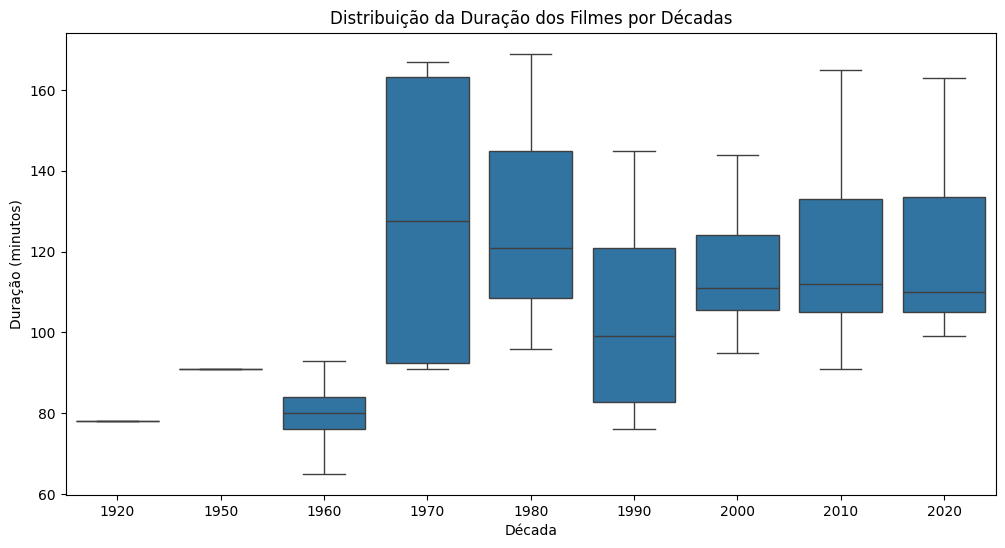

In [30]:
df['Década'] = (df['Ano'] // 10) * 10

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x="Década", y="Duração")

plt.title('Distribuição da Duração dos Filmes por Décadas')
plt.xlabel('Década')
plt.ylabel('Duração (minutos)')
plt.show()


### Filmes assistidos por década

C:\Users\User\AppData\Local\Temp\ipykernel_2652\484912809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette="viridis")


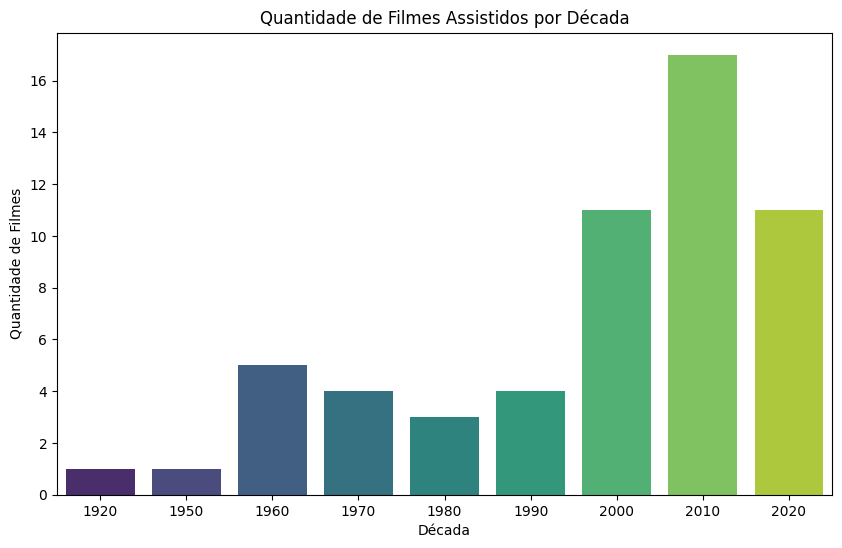

In [38]:
# Criar uma coluna para a década dos filmes
df['Decada'] = (df['Ano'] // 10) * 10

# Contar quantos filmes temos em cada década
filmes_por_decada = df['Decada'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette="viridis")

# Adicionando título e rótulos
plt.title('Quantidade de Filmes Assistidos por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')

# Exibir o gráfico
plt.show()
